In [1]:
import tensorflow_probability as tfp
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

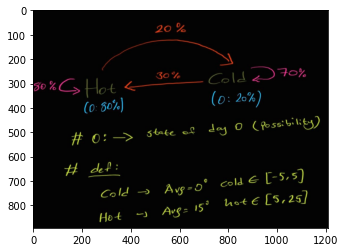

In [2]:
# Example 
# Basics: Wheather Model

# 1. Cold days are encoded by a 0 and hot days are encoded by a 1.
# 2. The first day in our sequence has an 80% chance of being cold.
# 3. A cold day has a 30% chance of being followed by a hot day.
# 4. A hot day has a 20% chance of being followed by a cold day.
# 5. On each day the temperature is normally distributed with mean 
# and standard deviation 0 and 5 on a cold day and mean and standard 
# deviation 15 and 10 on a hot day.

img = cv2.imread("assets/Wheather.jpg")
plt.imshow(img)
 

In [3]:
tfDist = tfp.distributions

# Initial state probabilities.
initialDist = tfDist.Categorical(probs=[0.8, 0.2]) 

# Distribution of tramsition possibilities.
transitionDist = tfDist.Categorical(probs=[[0.7,0.3],
                                           [0.2, 0.8]])

# Observation distribution w.r.t boundary values of cold and hot.
observationDist = tfDist.Normal(loc=[0.,15.], scale=[5., 10.])


In [4]:
# Markov Model
markovModel = tfDist.HiddenMarkovModel(initial_distribution=initialDist,
                                 transition_distribution=transitionDist,
                                 observation_distribution=observationDist,
                                 num_steps=7) # Steps: 7 days.

In [5]:
probsOfDays = markovModel.mean()
probsOfDays.shape

TensorShape([7])

In [6]:
# Result for the week.
probsOfDays # It is a tensor.

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([3.       , 5.9999995, 7.4999995, 8.25     , 8.625    , 8.812501 ,
       8.90625  ], dtype=float32)>

In [7]:
# creating session. [ Future Ref: Check sessions for Tensorflow C++ api ]
with tf.compat.v1.Session() as session:
    print(probsOfDays)

tf.Tensor([3.        5.9999995 7.4999995 8.25      8.625     8.812501  8.90625  ], shape=(7,), dtype=float32)
